<a href="https://colab.research.google.com/github/Xiangyu336/SCA-Final-Project/blob/main/JD_Project_Group_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. How many products were purchased per unit of time with and without promotion.
2. Compare all these promotions. Which promotions are more effective than others?
3. Build a regression model to predict the number of orders


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Replace 'path_to_folder' with the path to the folder containing your CSV files
folder_path = '/content/drive/My Drive/Emory Spring 24/Supply Chain/JD/'

Mounted at /content/drive


In [ ]:
# Reading each file into a pandas DataFrame
click_data = pd.read_csv(folder_path + 'JD_click_data.csv')
delivery_data = pd.read_csv(folder_path + 'JD_delivery_data.csv')
inventory_data = pd.read_csv(folder_path + 'JD_inventory_data.csv')
network_data = pd.read_csv(folder_path + 'JD_network_data.csv')
order_data = pd.read_csv(folder_path + 'JD_order_data.csv')
sku_data = pd.read_csv(folder_path + 'JD_sku_data.csv')
user_data = pd.read_csv(folder_path + 'JD_user_data.csv')

In [ ]:
# 1. Calculate how many products were purchased per unit of time with and without promotions
def calculate_promotion_effectiveness(orders_df):
    # Mark orders with and without promotions
    orders_df['has_promotion'] = orders_df['direct_discount_per_unit'] > 0

    # Count the number of orders with and without promotions and the number of products
    promotion_counts = orders_df.groupby('has_promotion').agg(
        total_orders=('order_ID', 'nunique'),
        total_quantity=('quantity', 'sum')
    ).reset_index()

    return promotion_counts

# 2. Compare the effects of different promotions
def compare_promotion_effectiveness(orders_df):
    # Categorize orders according to different types of promotions and count sales or number of products
    promotion_comparison = orders_df.groupby('type').agg(
        total_quantity=('quantity', 'sum'),
        total_sales=('final_unit_price', 'sum')
    ).reset_index()

    return promotion_comparison

In [ ]:
order_data[['quantity',
          'type', 'promise', 'original_unit_price', 'final_unit_price',
          'direct_discount_per_unit', 'quantity_discount_per_unit',
          'bundle_discount_per_unit', 'coupon_discount_per_unit', 'gift_item',
          'dc_ori', 'dc_des']] = order_data[['quantity',
                                           'type', 'promise', 'original_unit_price', 'final_unit_price',
                                           'direct_discount_per_unit', 'quantity_discount_per_unit',
                                           'bundle_discount_per_unit', 'coupon_discount_per_unit', 'gift_item',
                                           'dc_ori', 'dc_des']].replace('-','0').astype('float')

In [ ]:
order_data.head()

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type,promise,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des
0,d0cf5cc6db,0abe9ef2ce,581d5b54c1,2018-03-01,2018-03-01 17:14:25.0,1.0,2.0,0.0,89.0,79.0,0.0,10.0,0.0,0.0,0.0,4.0,28.0
1,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40.0,1.0,1.0,2.0,99.9,53.9,5.0,41.0,0.0,0.0,0.0,28.0,28.0
2,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26.0,1.0,1.0,2.0,78.0,58.5,19.5,0.0,0.0,0.0,0.0,28.0,28.0
3,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50.0,1.0,1.0,2.0,61.0,35.0,0.0,26.0,0.0,0.0,0.0,4.0,28.0
4,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37.0,1.0,1.0,1.0,78.0,53.0,19.0,0.0,0.0,6.0,0.0,3.0,16.0


In [ ]:
# calculate promotion effect
promotion_effectiveness = calculate_promotion_effectiveness(order_data)
print("Promotion effect statistics：")
print(promotion_effectiveness)

promotion_comparison = compare_promotion_effectiveness(order_data)
print("\nComparison of promotion effect：")
print(promotion_comparison)

Promotion effect statistics：
   has_promotion  total_orders  total_quantity
0          False        211789        294389.0
1           True        297011        374766.0

Comparison of promotion effect：
   type  total_quantity   total_sales
0   1.0        338958.0  2.345213e+07
1   2.0        330197.0  1.591201e+07


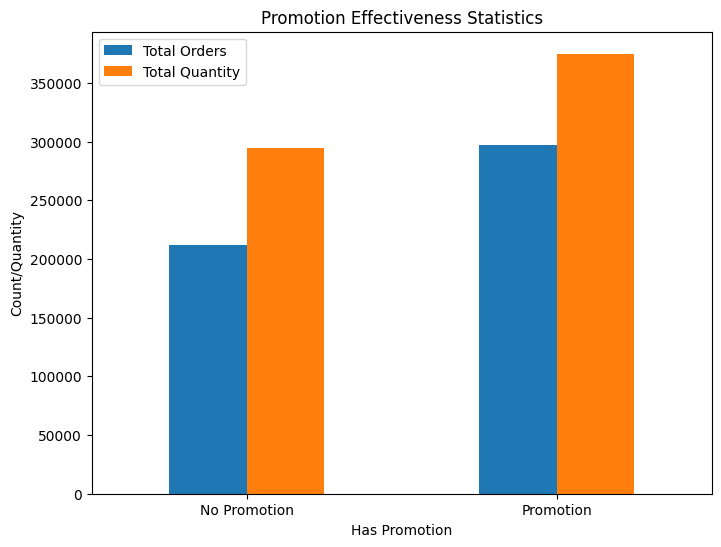

In [ ]:
import matplotlib.pyplot as plt

# Extract promotional effect statistics
promotion_effectiveness_data = promotion_effectiveness.set_index('has_promotion')

promotion_effectiveness_data.plot(kind='bar', rot=0, figsize=(8, 6))
plt.title('Promotion Effectiveness Statistics')
plt.xlabel('Has Promotion')
plt.ylabel('Count/Quantity')
plt.xticks([0, 1], ['No Promotion', 'Promotion'])
plt.legend(["Total Orders", "Total Quantity"])
plt.show()


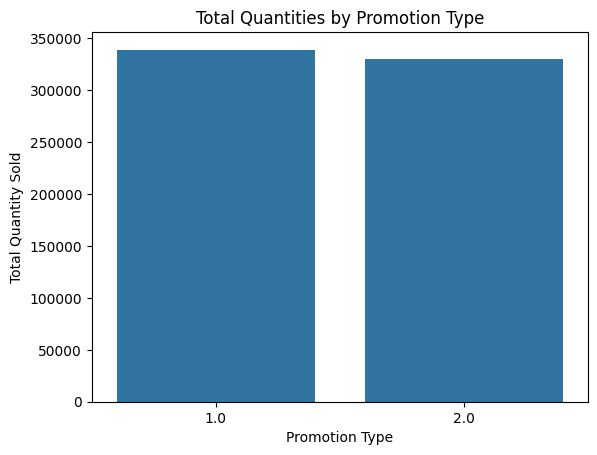

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 'promotion_comparison' is your DataFrame with promotion types and total quantities
sns.barplot(x='type', y='total_quantity', data=promotion_comparison)
plt.title('Total Quantities by Promotion Type')
plt.xlabel('Promotion Type')
plt.ylabel('Total Quantity Sold')
plt.show()



The bar chart shows that there are differences in the effectiveness of different types of promotions. If we observe that total sales of one type are significantly higher than others, this may indicate that customers are more responsive to that type of promotion. However, according to the figure, we can see that there is little difference between the two kinds of promotion, which indicates that customers are relatively active in promotion activities.

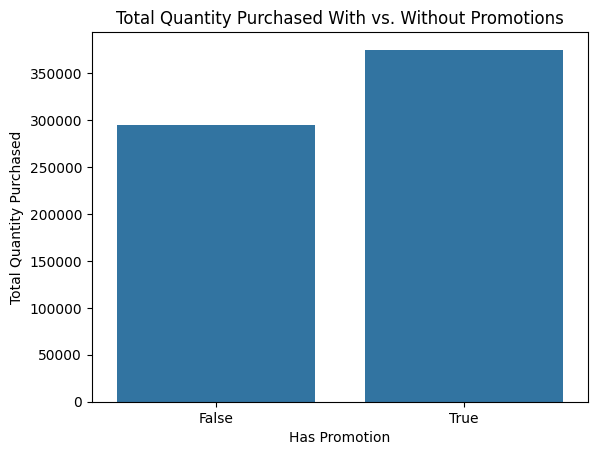

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Chart for Promotion Effectiveness:
sns.barplot(x='has_promotion', y='total_quantity', data=promotion_effectiveness)
plt.title('Total Quantity Purchased With vs. Without Promotions')
plt.xlabel('Has Promotion')
plt.ylabel('Total Quantity Purchased')
plt.show()


The figure provides a direct comparison of sales with and without promotions. Where True is significantly higher than False, this indicates that the promotion is effective in driving sales.

In [ ]:
merged_df = pd.merge(order_data, user_data, on='user_ID', how='left')
merged_df = pd.merge(merged_df, sku_data, on='sku_ID', how='left')
merged_df = pd.merge(merged_df, click_data, on=['sku_ID', 'user_ID'], how='left')

In [ ]:
import numpy as np
merged_df['direct_discount_per_unit_binary'] = np.where(merged_df['direct_discount_per_unit'] > 0, 1, 0)
merged_df['quantity_discount_per_unit_binary'] = np.where(merged_df['quantity_discount_per_unit'] > 0, 1, 0)
merged_df['bundle_discount_per_unit_binary'] = np.where(merged_df['bundle_discount_per_unit'] > 0, 1, 0)
merged_df['coupon_discount_per_unit_binary'] = np.where(merged_df['coupon_discount_per_unit'] > 0, 1, 0)

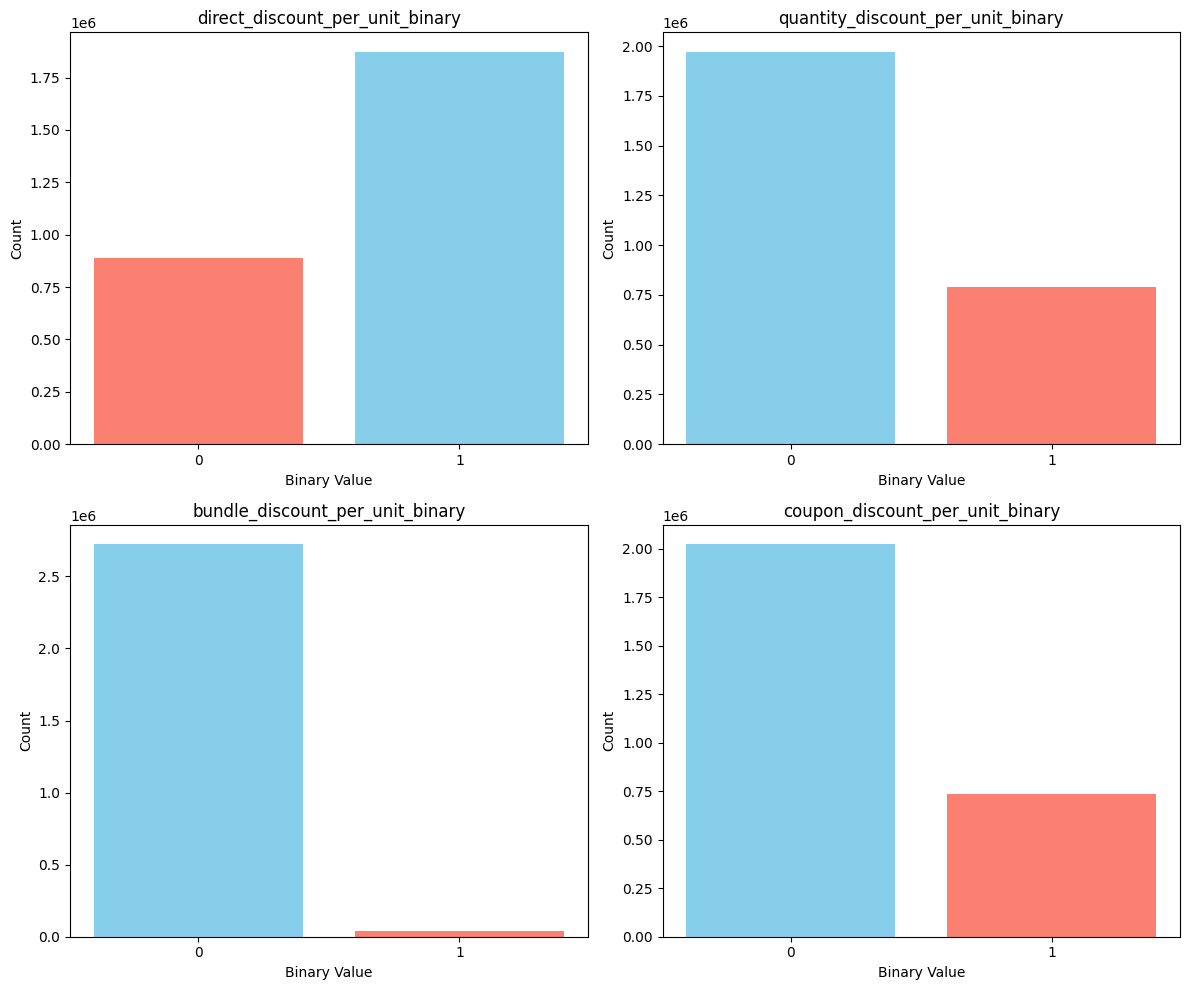

In [ ]:
# Extract the field data after binarization
binary_columns = ['direct_discount_per_unit_binary', 'quantity_discount_per_unit_binary',
                  'bundle_discount_per_unit_binary', 'coupon_discount_per_unit_binary']

# Create subgraph
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Traverse the binarized fields to draw a bar chart
for i, col in enumerate(binary_columns):
    ax = axes[i//2, i%2]
    value_counts = merged_df[col].value_counts()
    ax.bar(value_counts.index, value_counts.values, color=['skyblue', 'salmon'])
    ax.set_title(col)
    ax.set_xlabel('Binary Value')
    ax.set_ylabel('Count')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['0', '1'])

plt.tight_layout()
plt.show()

In [ ]:
# Label: Counts the total number of products ordered by the user history
user_order_quantity = merged_df.groupby('user_ID')['quantity'].sum().reset_index()
user_order_quantity.columns = ['user_ID', 'total_order_quantity']
# Keep date & gender
latest_gender = merged_df.sort_values(by='order_date', ascending=False).drop_duplicates(subset=['user_ID'])[['user_ID', 'gender']]
# Merge label and gender information
merged_data = pd.merge(user_order_quantity, latest_gender, on='user_ID', how='left')
# Calculate the latest user information
latest_user_info = merged_df.sort_values(by='order_date', ascending=False).drop_duplicates(subset=['user_ID'])[['user_ID', 'user_level', 'plus', 'age', 'marital_status', 'education', 'city_level', 'purchase_power']]
merged_data = pd.merge(merged_data, latest_user_info, on='user_ID', how='left')
# Drop the Date Feature
merged_df.drop(['order_date', 'order_time', 'activate_date', 'deactivate_date'], axis=1, inplace=True)

In [ ]:
#
#user_stats = merged_df.groupby('user_ID').agg(
#    avg_original_unit_price=('original_unit_price', 'mean'),
#    total_discount=('direct_discount_per_unit', 'sum'),
#    total_quantity_discount=('quantity_discount_per_unit', 'sum')
#).reset_index()#

user_stats = merged_df.groupby('user_ID').agg(
    avg_original_unit_price=('original_unit_price', 'mean'),
    total_discount=('direct_discount_per_unit_binary', 'sum'),
    total_quantity_discount=('quantity_discount_per_unit_binary', 'sum'),
    total_bundle_discount=('bundle_discount_per_unit_binary', 'sum'),
    total_coupon_discount=('coupon_discount_per_unit_binary', 'sum')
).reset_index()

#
merged_data = pd.merge(merged_data, user_stats, on='user_ID', how='left')

In [ ]:
merged_data.head()

,user_ID,total_order_quantity,gender,user_level,plus,age,marital_status,education,city_level,purchase_power,avg_original_unit_price,total_discount,total_quantity_discount,total_bundle_discount,total_coupon_discount
0,000089d6a6,8.0,F,1,0,26-35,S,3,4,3,330.0,8,0,0,0
1,0000babd1f,2.0,U,1,0,U,U,-1,-1,-1,39.0,0,0,0,0
2,0000bc018b,8.0,F,3,0,>=56,M,3,2,3,79.0,0,0,0,0
3,0000d0e5ab,2.0,M,3,0,26-35,M,3,2,2,298.0,2,0,0,0
4,0000dce472,11.0,U,3,1,U,U,-1,-1,-1,166.0,11,11,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# numerically encode the 'gender' column
label_encoder = LabelEncoder()
merged_data['gender'] = label_encoder.fit_transform(merged_data['gender'])

# Same with 'age' column
merged_data['age'] = label_encoder.fit_transform(merged_data['age'])

merged_data['marital_status'] = label_encoder.fit_transform(merged_data['marital_status'])

# Set the education, city_level, and purchase_power columns to binary
merged_data['education_binary'] = np.where(merged_data['education'] > 0, 1, 0)
merged_data['city_level_binary'] = np.where(merged_data['city_level'] > 0, 1, 0)
merged_data['purchase_power_binary'] = np.where(merged_data['purchase_power'] > 0, 1, 0)

#  Standardize the data
scaler = StandardScaler()
merged_data[['user_level', 'plus', 'age', 'marital_status', 'education', 'city_level', 'purchase_power',
             'avg_original_unit_price', 'total_discount', 'total_quantity_discount']] = scaler.fit_transform(
    merged_data[['user_level', 'plus', 'age', 'marital_status', 'education', 'city_level', 'purchase_power',
                 'avg_original_unit_price', 'total_discount', 'total_quantity_discount']])

# Log conversion of labels
merged_data['total_order_quantity'] = np.log1p(merged_data['total_order_quantity'])

# Delete the user_ID column
merged_data.drop('user_ID', axis=1, inplace=True)

# Prepare features and tags
X = merged_data.drop('total_order_quantity', axis=1)
y = merged_data['total_order_quantity']

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training sets and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

model = lgb.LGBMRegressor()

# Training model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculated mean square Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.063615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 696
[LightGBM] [Info] Number of data points in the train set: 363917, number of used features: 16
[LightGBM] [Info] Start training from score 1.682411
MSE: 0.131121365068569


In [ ]:
# Restores the label column to its original value
y_orig = np.expm1(y)

y_orig.describe()

count    454897.000000
mean          7.883286
std          77.930148
min           1.000000
25%           2.000000
50%           4.000000
75%           8.000000
max       35233.000000
Name: total_order_quantity, dtype: float64

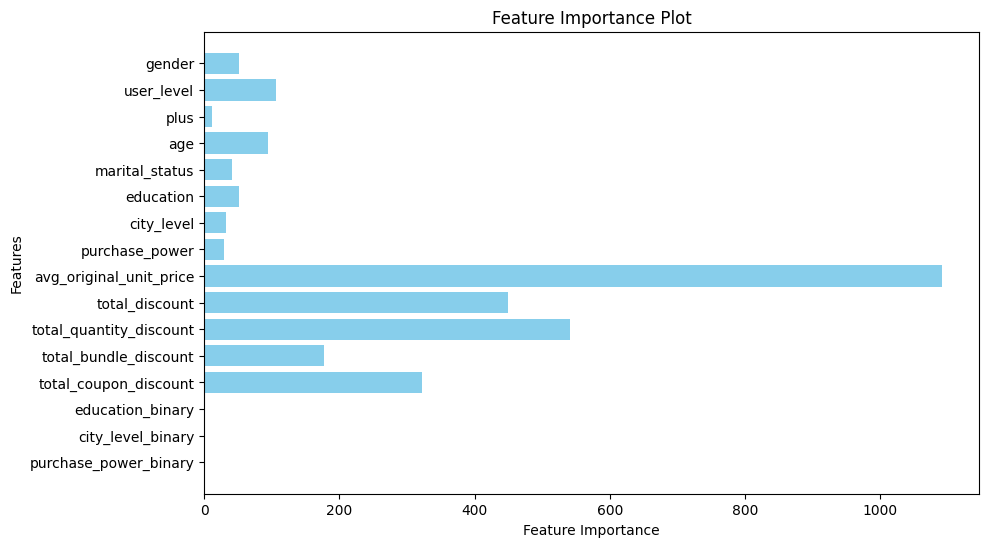

In [ ]:
# Acquired feature importance
feature_importance = model.feature_importances_
feature_names = X.columns

# Draw bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis()  # Invert the Y-axis so that features with high importance appear at the top
plt.show()

Feature importance shows which customer attributes have the greatest impact on the number of purchases. Gender, user level, and marital status stand out, indicating that these factors are closely related to purchasing behavior. Marketing campaigns can be more effectively tailored to specific groups based on these attributes.

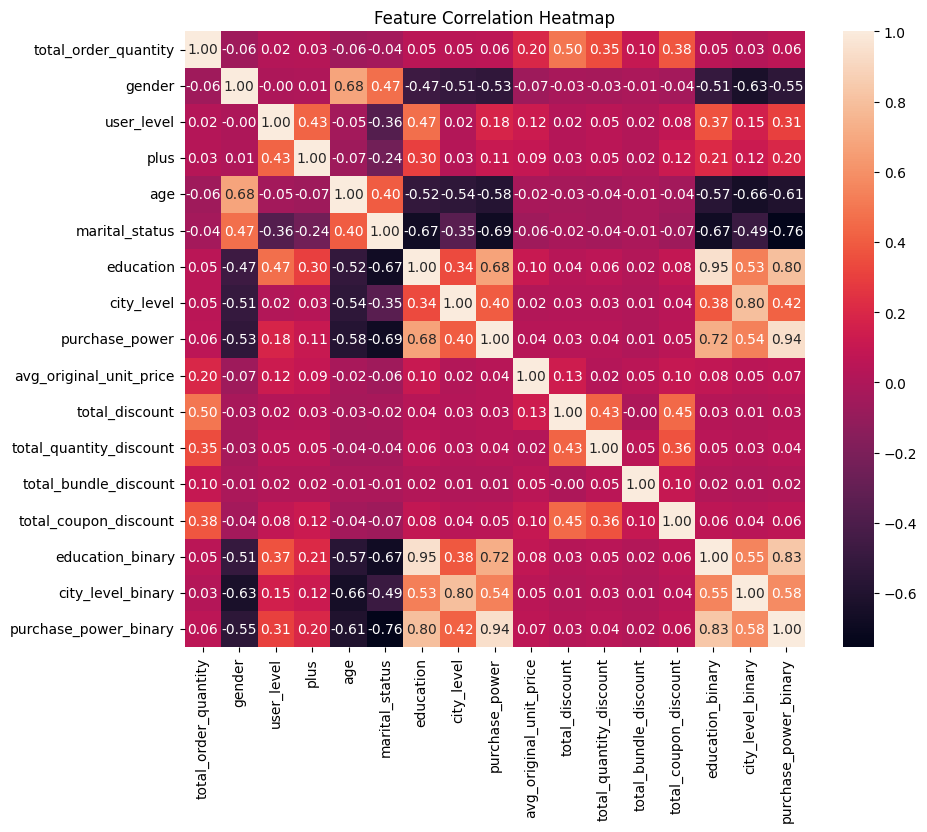

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(merged_data.corr(), annot=True, fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


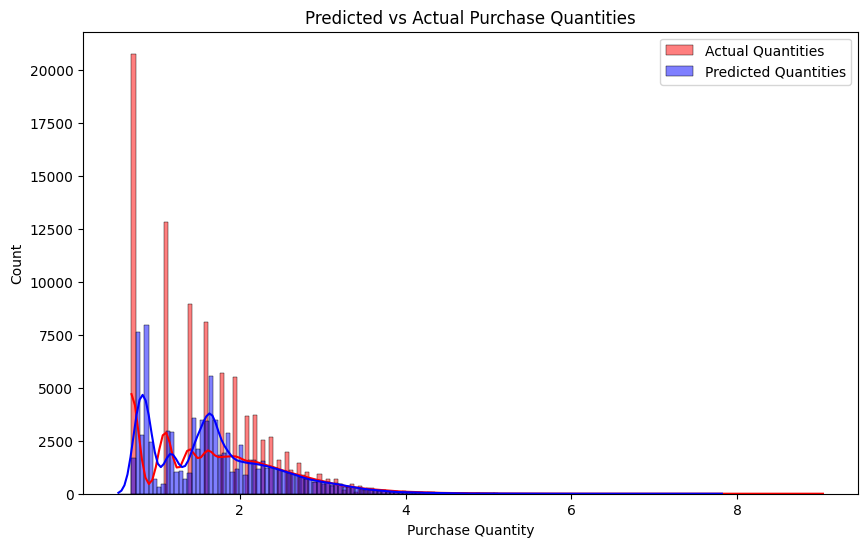

In [ ]:
# Predicted vs Actual Quantities (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color="red", label="Actual Quantities", kde=True)
sns.histplot(y_pred, color="blue", label="Predicted Quantities", kde=True)
plt.title('Predicted vs Actual Purchase Quantities')
plt.xlabel('Purchase Quantity')
plt.legend()
plt.show()


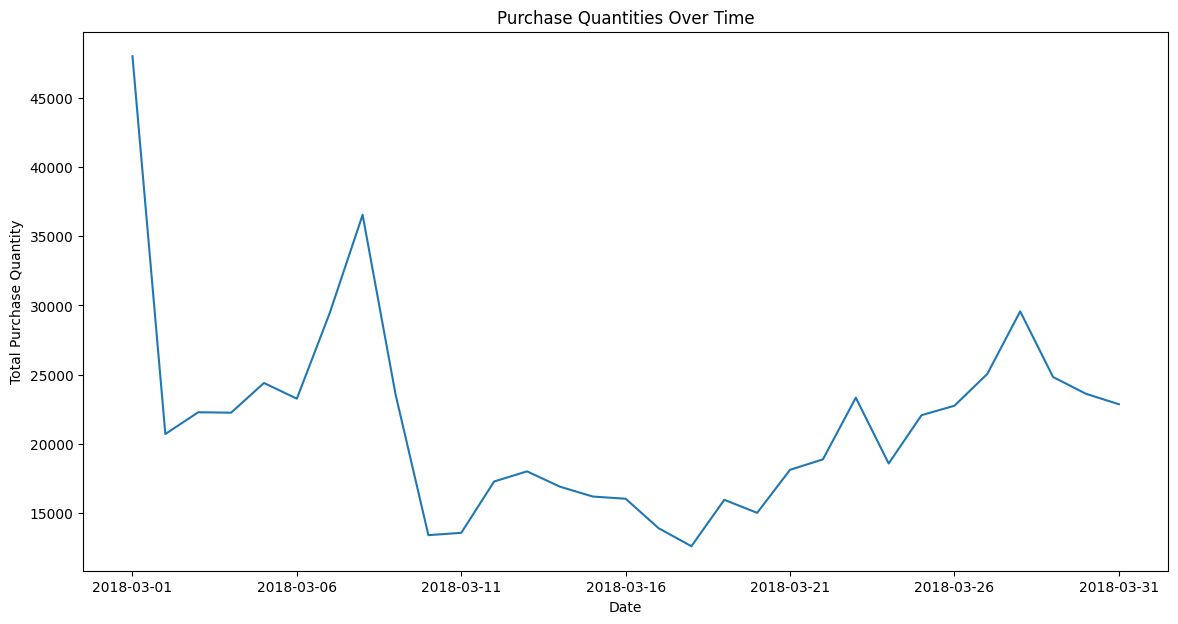

In [ ]:
# Temporal Trends (Line Chart)
## 'order_data' has a 'date' column and 'quantity' column
plt.figure(figsize=(14, 7))
order_data.groupby('order_date')['quantity'].sum().plot(kind='line')
plt.title('Purchase Quantities Over Time')
plt.xlabel('Date')
plt.ylabel('Total Purchase Quantity')
plt.show()
